In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
import numpy as np
import math
#### E-M Coin Toss Example as given in the EM tutorial paper by Do and Batzoglou* ####
def get_mn_log_likelihood(obs,probs):
    """ Return the (log)likelihood of obs, given the probs"""
    # Multinomial Distribution Log PMF
    # ln (pdf)      =             multinomial coeff            *   product of probabilities
    # ln[f(x|n, p)] = [ln(n!) - (ln(x1!)+ln(x2!)+...+ln(xk!))] + [x1*ln(p1)+x2*ln(p2)+...+xk*ln(pk)]

    multinomial_coeff_denom= 0
    prod_probs = 0
    for x in range(0,len(obs)): # loop through state counts in each observation
        multinomial_coeff_denom = multinomial_coeff_denom + math.log(math.factorial(obs[x]))
        prod_probs = prod_probs + obs[x]*math.log(probs[x])

    multinomial_coeff = math.log(math.factorial(sum(obs))) -  multinomial_coeff_denom
    likelihood = multinomial_coeff + prod_probs
    return likelihood

# 1st:  Coin B, {HTTTHHTHTH}, 5H,5T
# 2nd:  Coin A, {HHHHTHHHHH}, 9H,1T
# 3rd:  Coin A, {HTHHHHHTHH}, 8H,2T
# 4th:  Coin B, {HTHTTTHHTT}, 4H,6T
# 5th:  Coin A, {THHHTHHHTH}, 7H,3T
# so, from MLE: pA(heads) = 0.80 and pB(heads)=0.45

# represent the experiments
head_counts = np.array([5,9,8,4,7])
tail_counts = 10-head_counts
experiments = zip(head_counts,tail_counts)

# initialise the pA(heads) and pB(heads)
pA_heads = np.zeros(100); pA_heads[0] = 0.60
pB_heads = np.zeros(100); pB_heads[0] = 0.50

# E-M begins!
delta = 0.001
j = 0 # iteration counter
improvement = float('inf')
while (improvement>delta):
    expectation_A = np.zeros((5,2), dtype=float)
    expectation_B = np.zeros((5,2), dtype=float)
    for i in range(0,len(head_counts)):
        e = [head_counts[i],tail_counts[i]] # i'th experiment
        ll_A = get_mn_log_likelihood(e,np.array([pA_heads[j],1-pA_heads[j]])) # loglikelihood of e given coin A
        ll_B = get_mn_log_likelihood(e,np.array([pB_heads[j],1-pB_heads[j]])) # loglikelihood of e given coin B

        weightA = math.exp(ll_A) / ( math.exp(ll_A) + math.exp(ll_B) ) # corresponding weight of A proportional to likelihood of A
        weightB = math.exp(ll_B) / ( math.exp(ll_A) + math.exp(ll_B) ) # corresponding weight of B proportional to likelihood of B

        expectation_A[i] = np.dot(weightA, e)
        expectation_B[i] = np.dot(weightB, e)

    pA_heads[j+1] = sum(expectation_A)[0] / sum(sum(expectation_A));
    pB_heads[j+1] = sum(expectation_B)[0] / sum(sum(expectation_B));

    improvement = max( abs(np.array([pA_heads[j+1],pB_heads[j+1]]) - np.array([pA_heads[j],pB_heads[j]]) ))
    j = j+1
print(j)


IndexError: invalid index to scalar variable.

In [16]:
deltas = np.array([0.00001, 0.0001, 0.001, 0.01, 0.1])

In [17]:
iterations = np.array([13, 11, 8, 5, 2])

In [18]:
iterations

array([13, 11,  8,  5,  2])

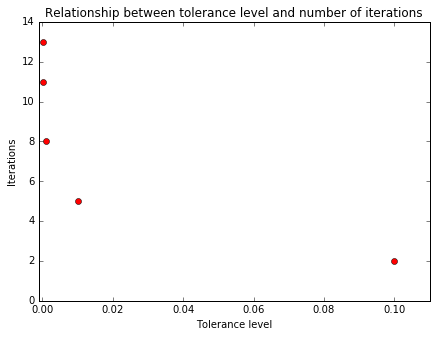

In [19]:
figsize(7, 5)
plot([0.00001, 0.0001, 0.001, 0.01, 0.1], [13, 11, 8, 5, 2], 'ro')
axis([-0.001, 0.11, 0, 14])
xlabel('Tolerance level')
ylabel('Iterations')
title('Relationship between tolerance level and number of iterations')
savefig('coin_toss.pdf')

In [23]:
import numpy as np
from sklearn import mixture
np.random.seed(1)
g = mixture.GMM(n_components=2)
# Generate random observations with two modes centered on 0
# and 10 to use for training.
obs = np.concatenate((np.random.randn(100, 1),
                       10 + np.random.randn(300, 1)))
g.fit(obs)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [25]:
g.aic(obs)

1573.4669138679346

In [26]:
g.bic(obs)

1593.4242366034746

In [6]:
np.round(g.weights_, 2)

array([ 0.5,  0.5])

In [7]:
np.round(g.means_, 2)

array([[ 10.],
       [  0.]])

In [8]:
np.round(g.covars_, 2)

array([[ 0.],
       [ 0.]])

In [9]:
g.predict([[0], [2], [9], [10]])

array([1, 1, 0, 0])

In [10]:
np.round(g.score([[0], [2], [9], [10]]), 2)

array([  1.84000000e+00,  -1.99816000e+03,  -4.98160000e+02,
         1.84000000e+00])

In [11]:
# Refit the model on new data (initial parameters remain the
# same), this time with an even split between the two modes.
g.fit(20 * [[0]] +  20 * [[10]])

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [12]:
np.round(g.weights_, 2)

array([ 0.5,  0.5])